In [193]:
import numpy as np
import glob
import os
import csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [157]:
basepath = '/Users/gracer/Google Drive/HCP_graph/1200/'
print(basepath)
# import pdb; pdb.set_trace()
mlist_names=['BMI_pos','BMI_neg','AoM_pos','AoM_neg','int_pos','int_neg','motion']
list_names=['BMI_pos','BMI_neg','AoM_pos','AoM_neg','int_pos','int_neg']

p_m=os.path.join(basepath,'R2R','hmotion_corr','p_corr.csv')
p_orig=os.path.join(basepath,'5000perms','p_corrected.csv')

orig_T=os.path.join(basepath,'5000perms','tstatistic.csv')
motion_T = os.path.join(basepath,'R2R','hmotion_corr','tstats.csv') 

/Users/gracer/Google Drive/HCP_graph/1200/


In [158]:
def makeP(filepath, names):
    df=pd.read_csv(filepath, sep=',',header=None)
    print(df.shape)
    dictt={}
    for x in range(0,df.shape[0]):
        print(x)
        a=np.array(df.iloc[x])
        b=np.reshape(a, (15,15))
        b=1-b
        dictt[names[x]]=pd.DataFrame(b)
    return(dictt)
    

In [159]:
def makeT(filepath, names):
    df=pd.read_csv(filepath, sep=',',header=None)
    print(df.shape)
    dictt={}
    for x in range(0,df.shape[0]):
        print(x)
        a=np.array(df.iloc[x])
        b=np.reshape(a, (15,15))
        dictt[names[x]]=pd.DataFrame(b)
    return(dictt)
    

In [160]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0.05 else 'black'
    return 'color: %s' % color

In [223]:
def skimP(dictt,name):
    mask = np.zeros_like(dictt[name])
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(14, 10))
        ax = sns.heatmap(dictt[name], mask=mask,annot=True, center=0.05,square=True, cmap='gist_ncar')
        ax.set_title(name)
    

In [238]:
def MRT(Tdict, Pdict, name):
    T=Tdict[name]
    P=Pdict[name]
    criteria = T[P < 0.05]
    mask = np.zeros_like(T)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(21, 15))
        ax = sns.heatmap(criteria, mask=mask,annot=True, vmin=-6, vmax=6,square=True, cmap='gnuplot2')
        ax.set_title(name)
#     return(criteria.style.applymap(color_negative_red))

In [166]:
originalP=makeP(p_orig,list_names)
motionP=makeP(p_m,mlist_names)

(6, 225)
0
1
2
3
4
5
(7, 225)
0
1
2
3
4
5
6


In [167]:
originalT=makeT(orig_T,list_names)
motionT=makeT(motion_T,mlist_names)

(6, 225)
0
1
2
3
4
5
(7, 225)
0
1
2
3
4
5
6


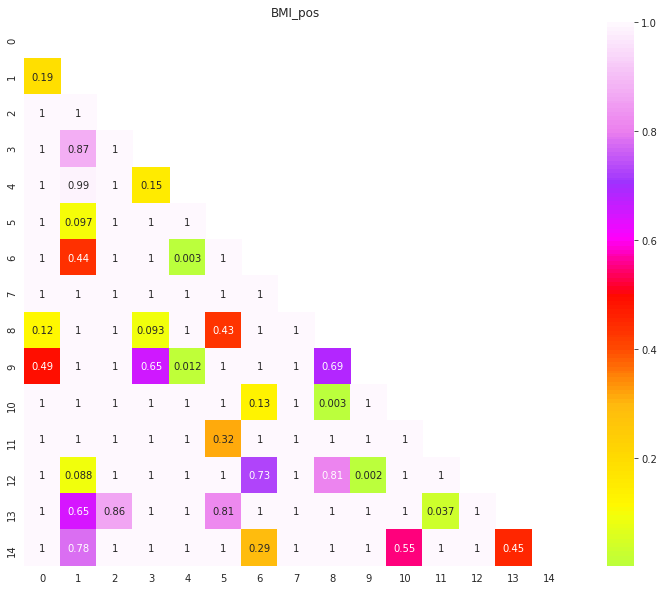

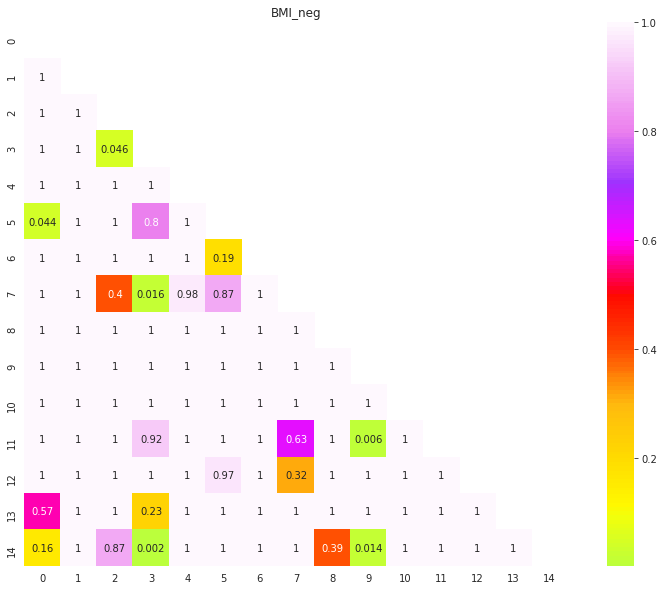

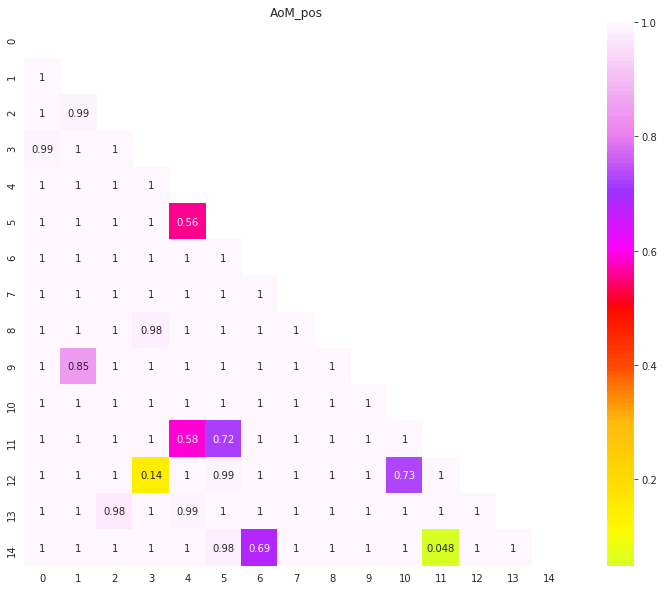

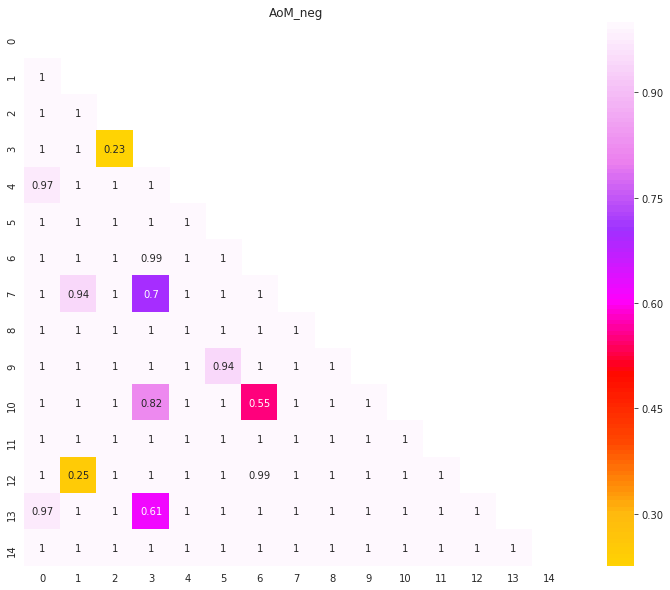

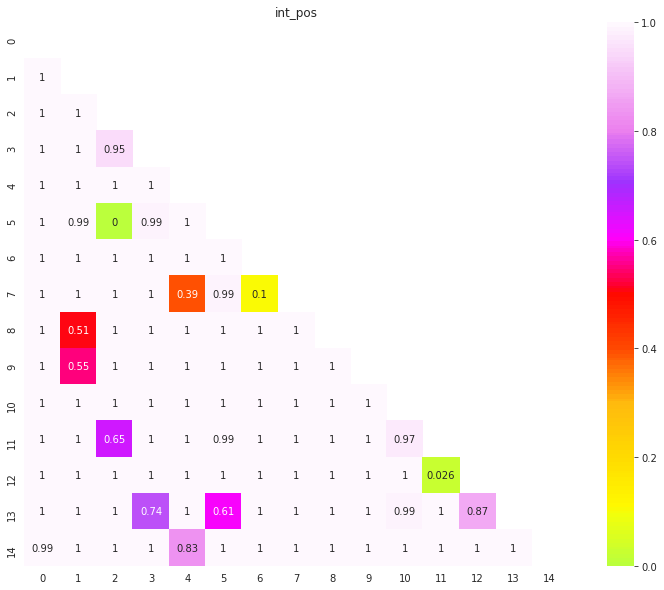

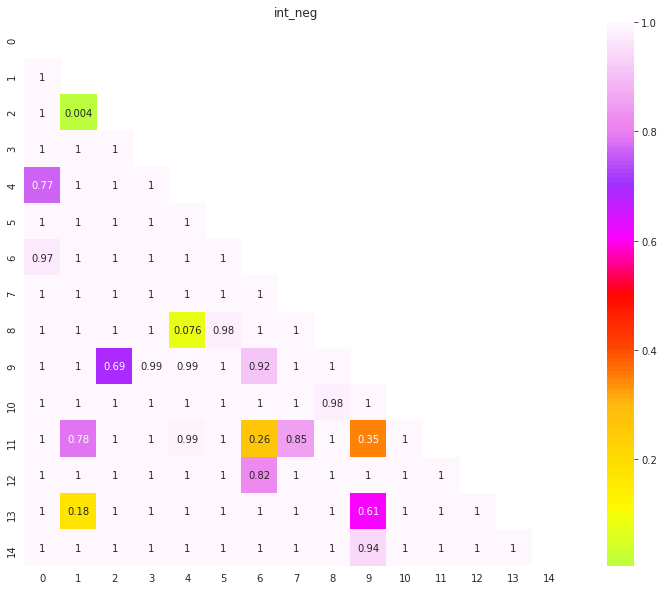

In [224]:
for key, value in originalP.items():
    skimP(originalP,key)

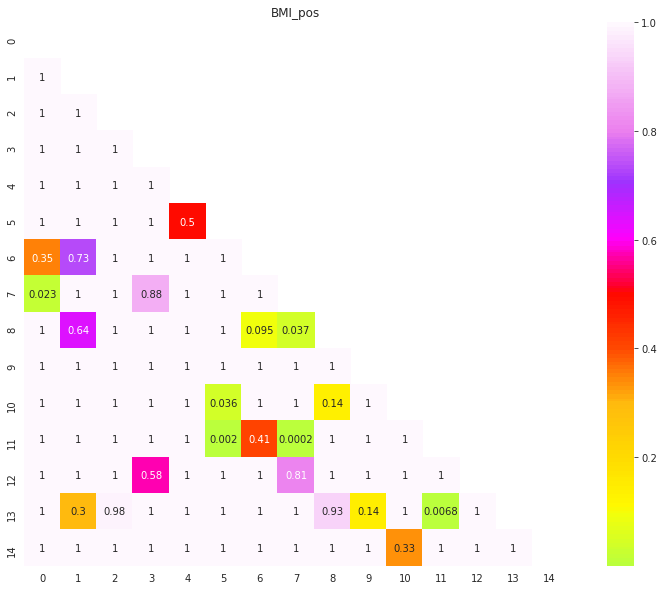

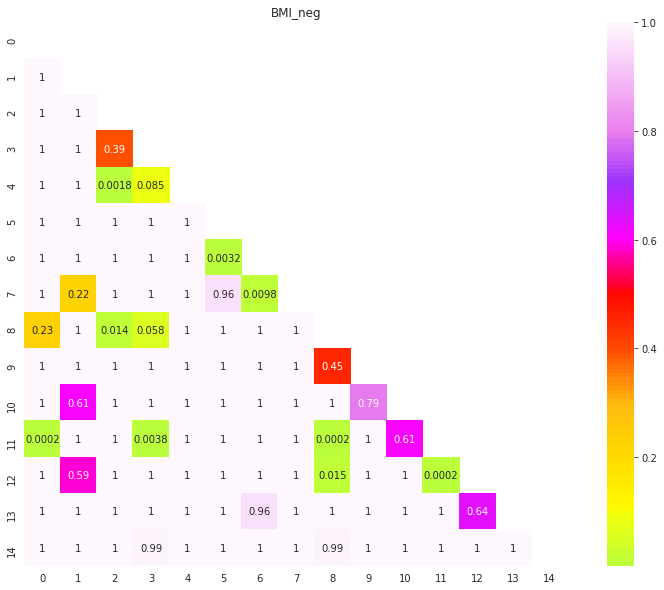

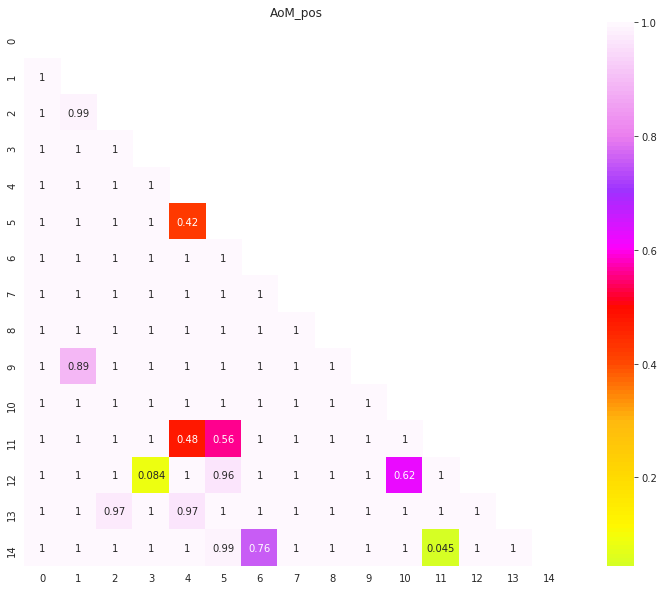

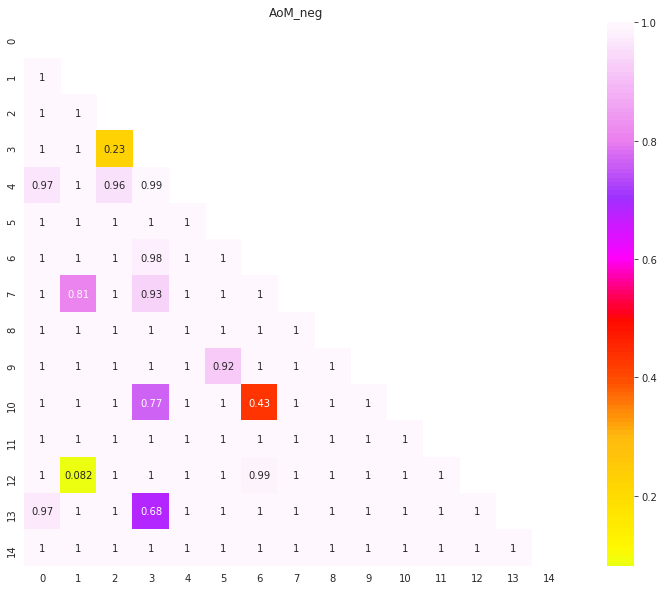

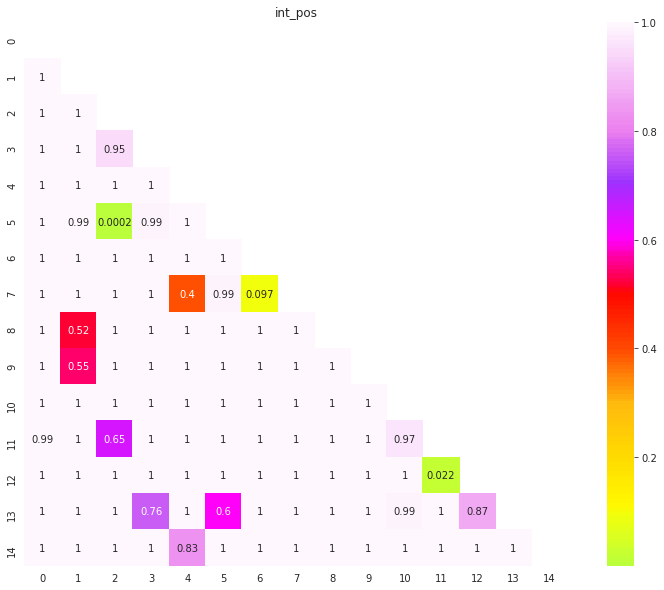

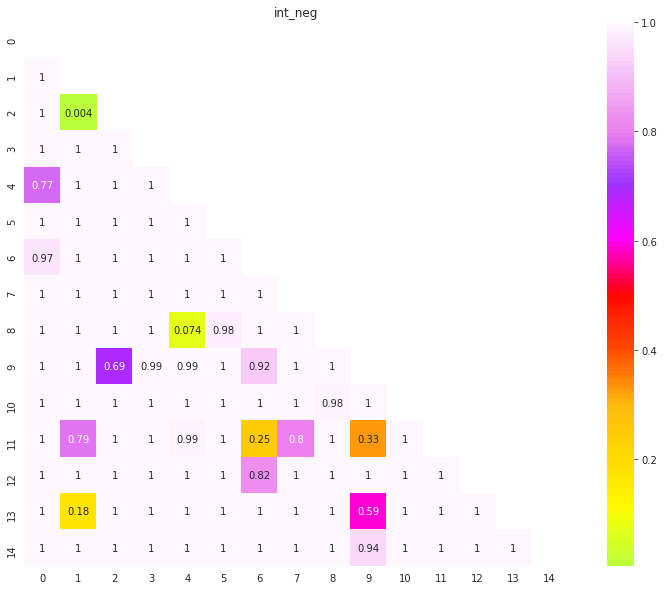

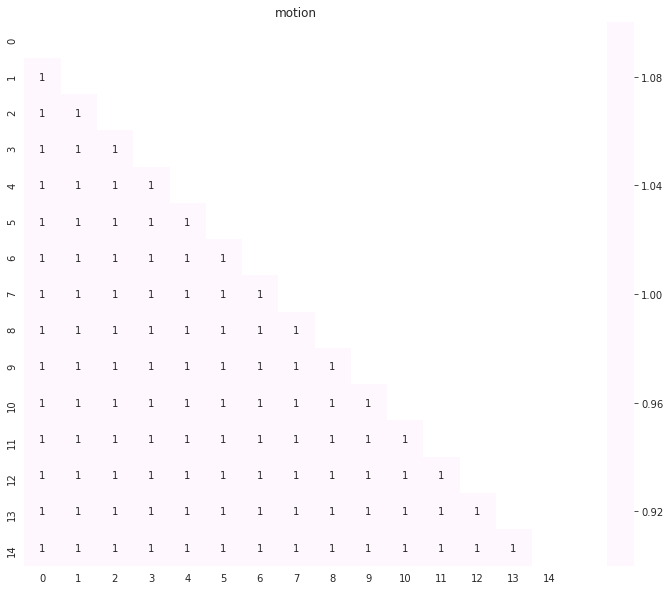

In [225]:
for key, value in motionP.items():
    skimP(motionP,key)

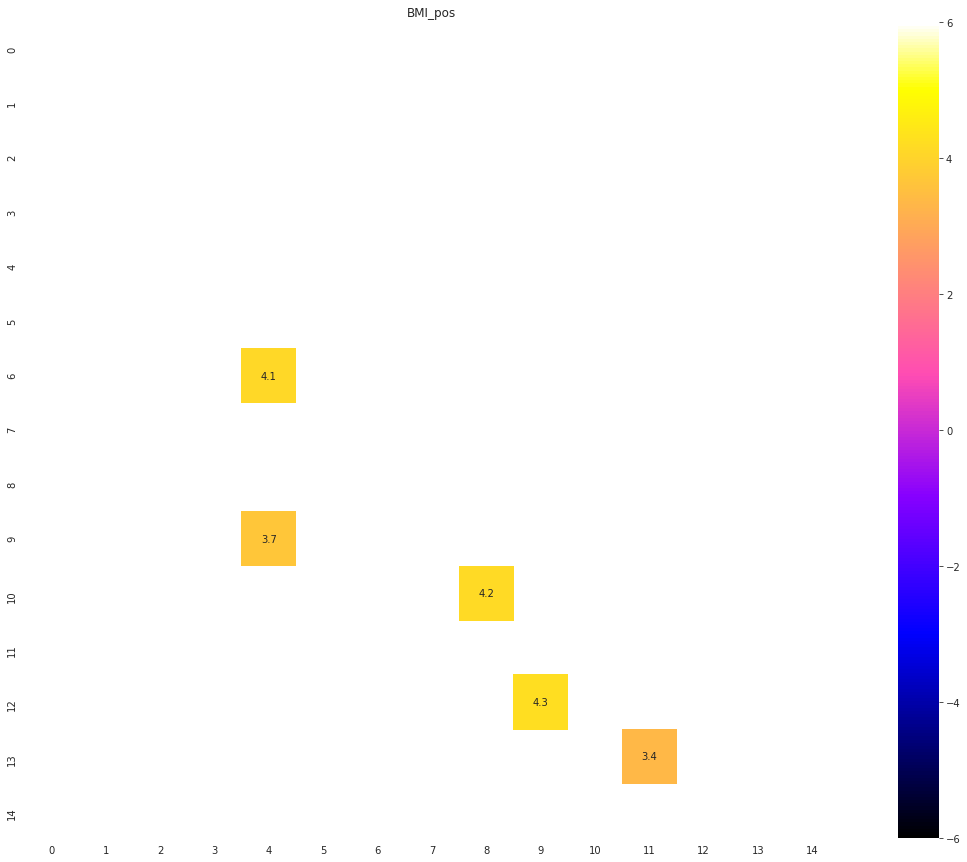

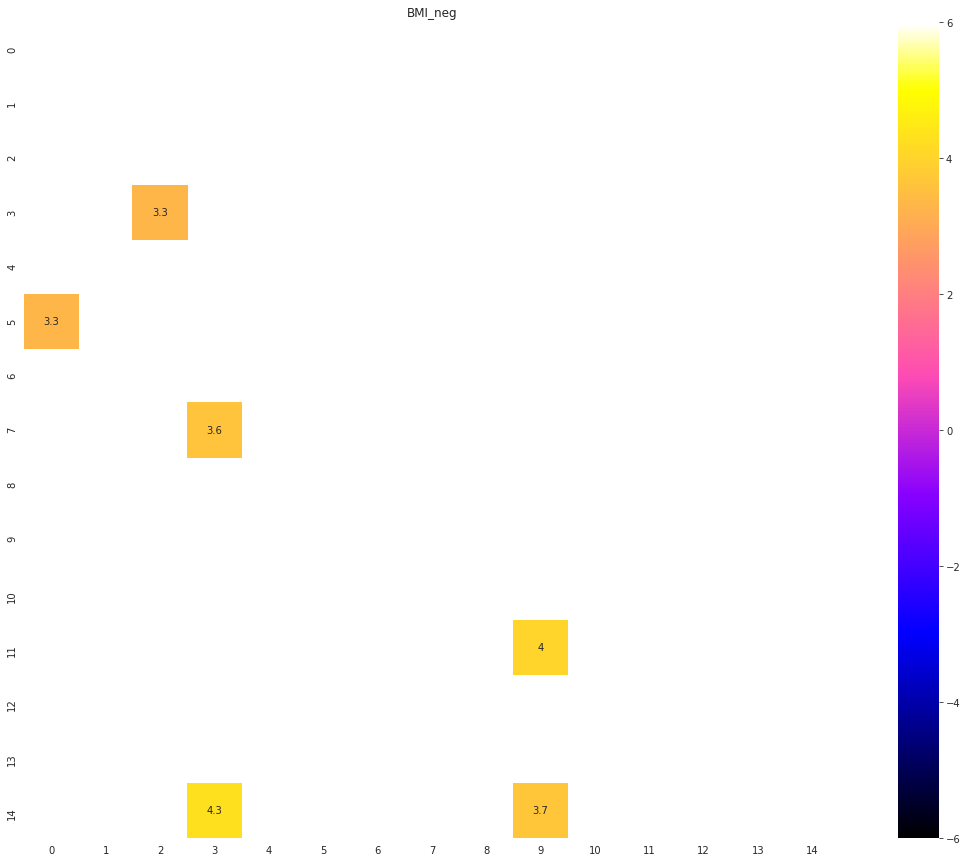

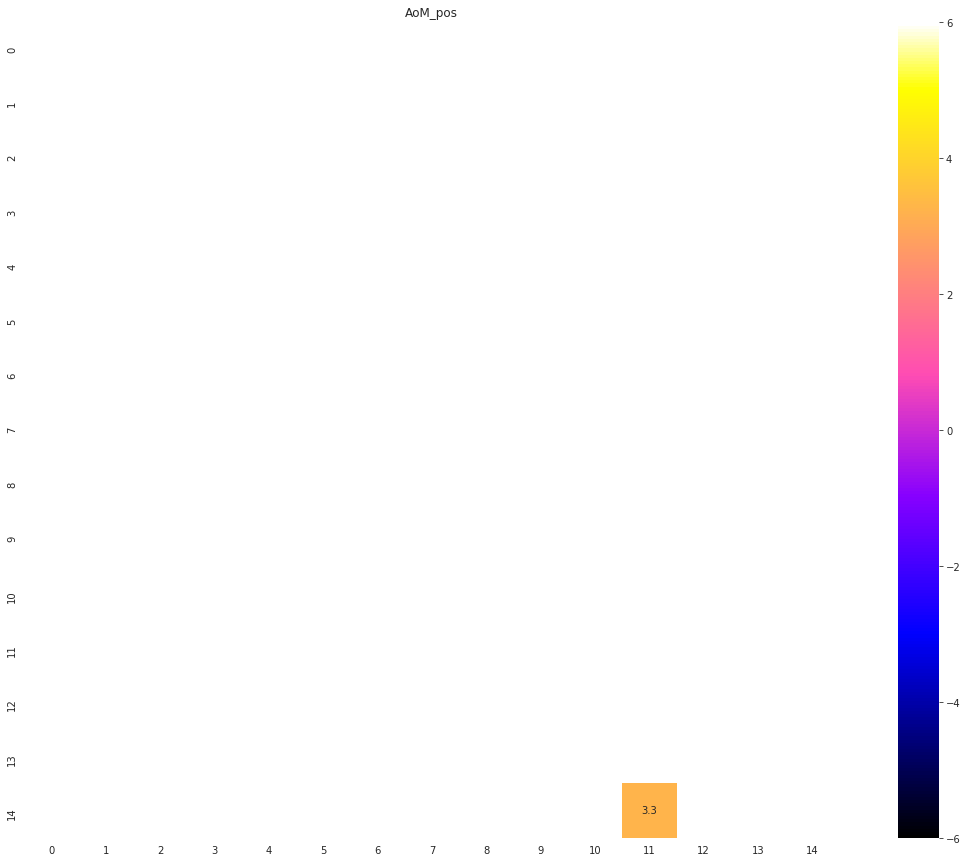

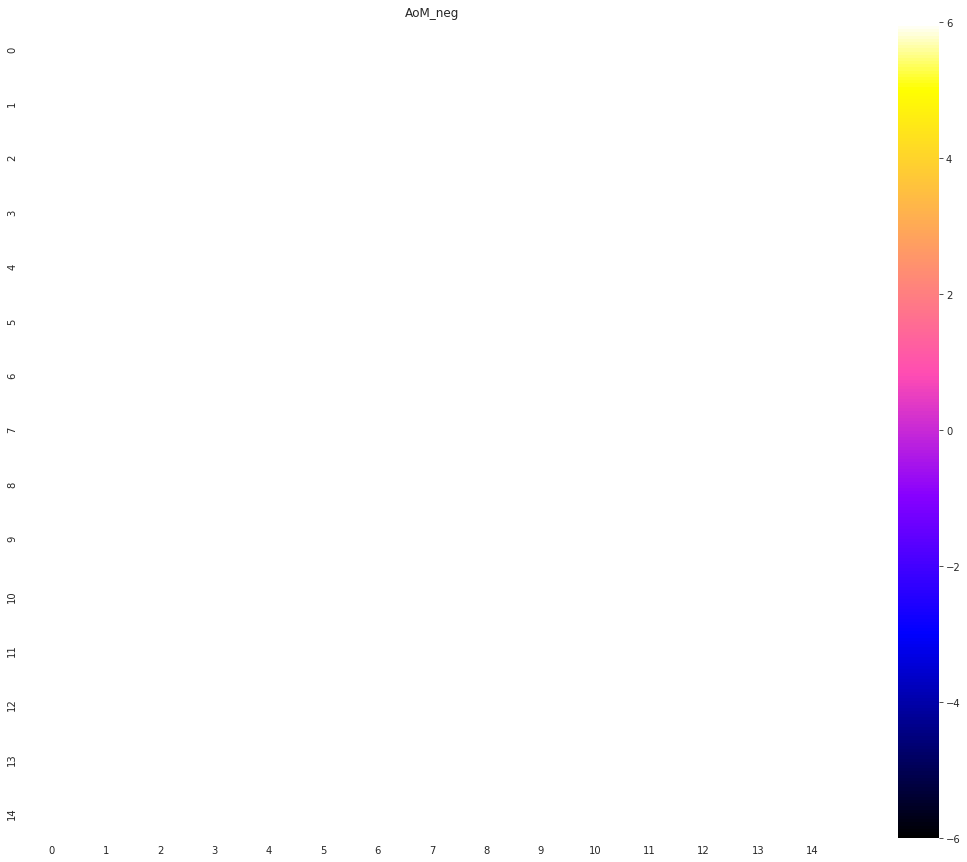

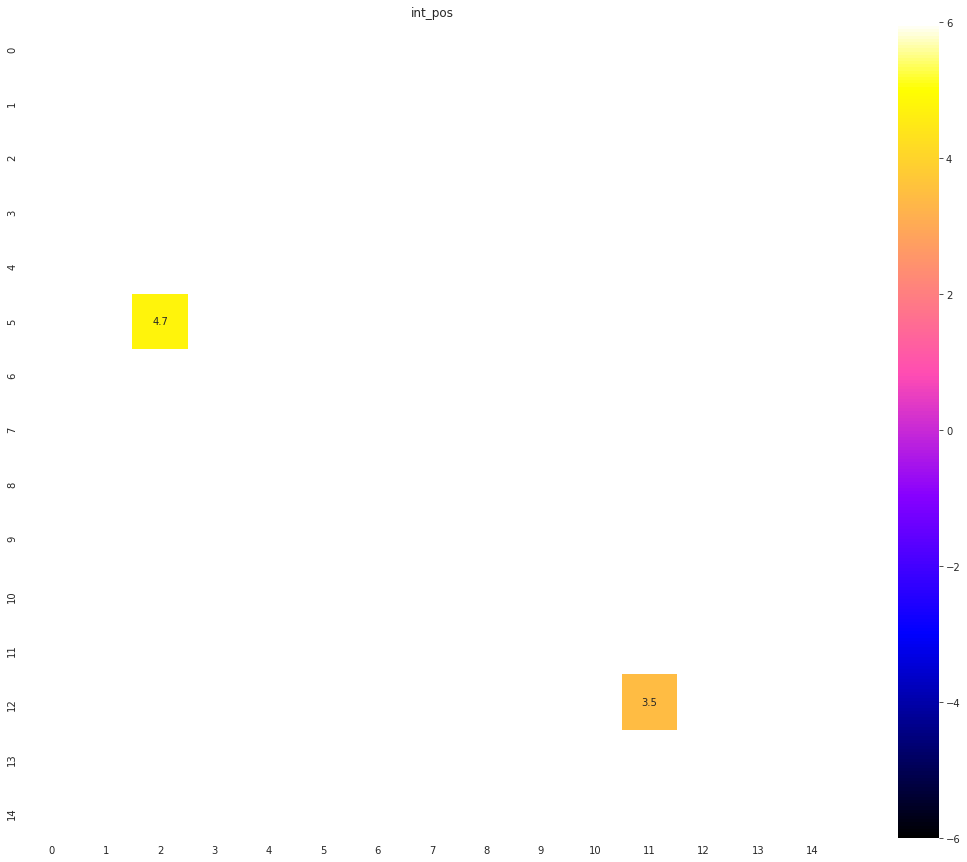

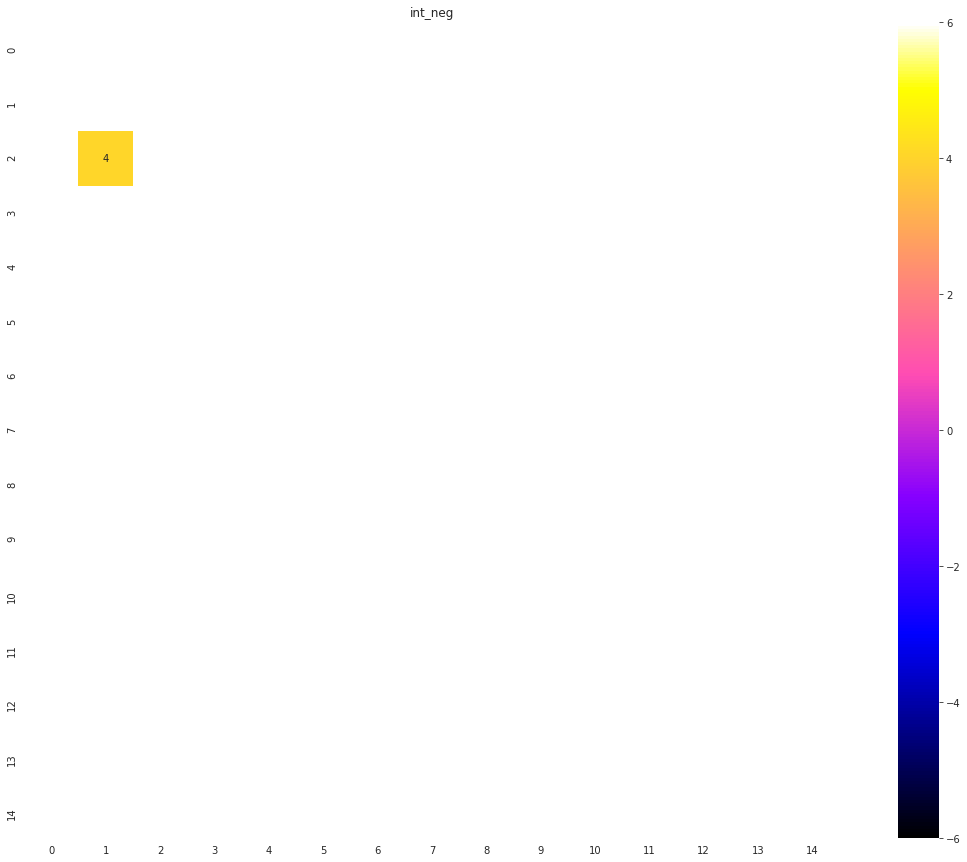

In [239]:
for key, value in originalP.items():
    MRT(originalT, originalP, key)

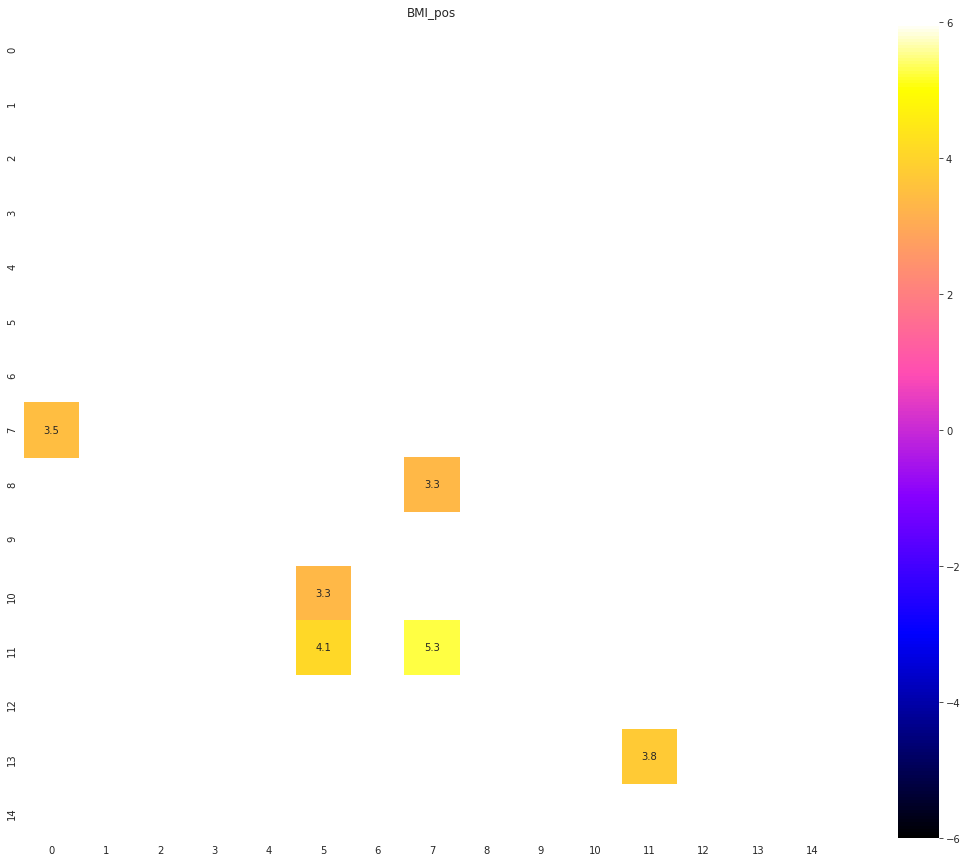

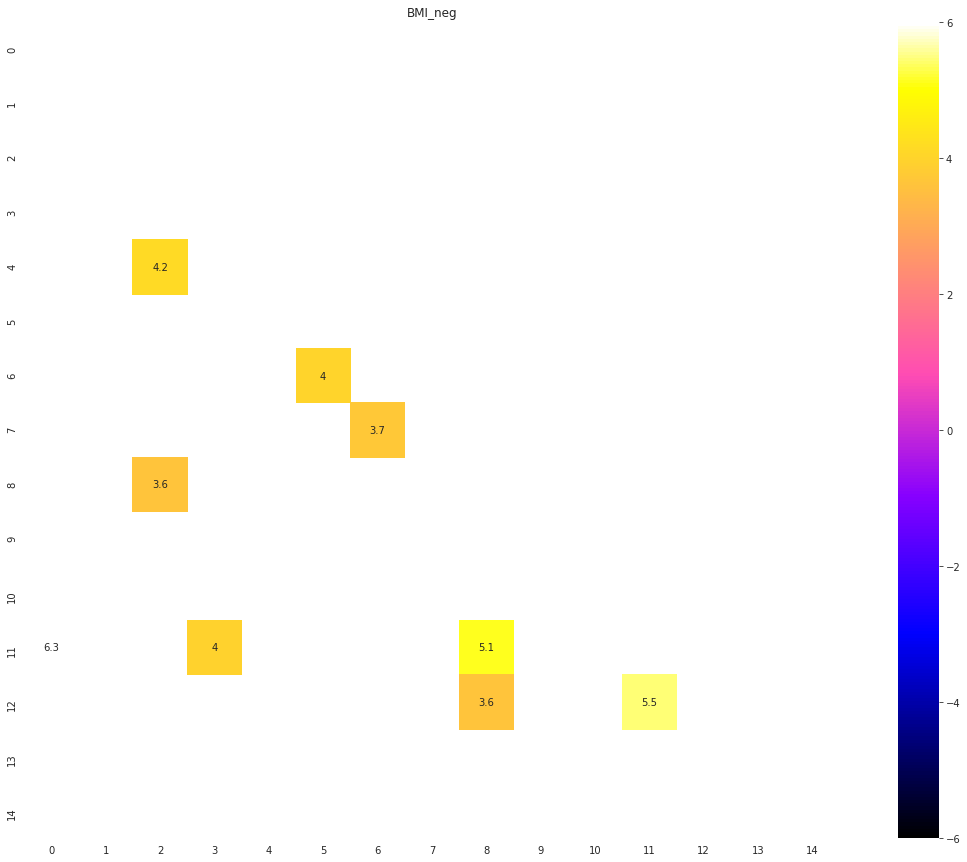

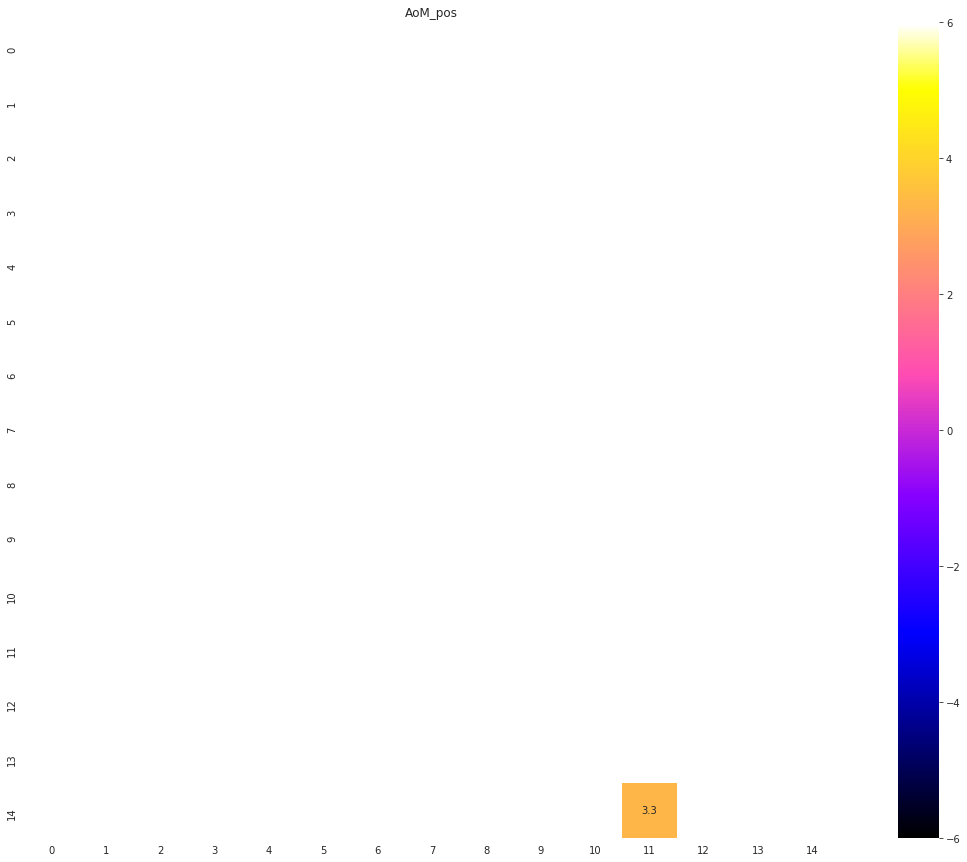

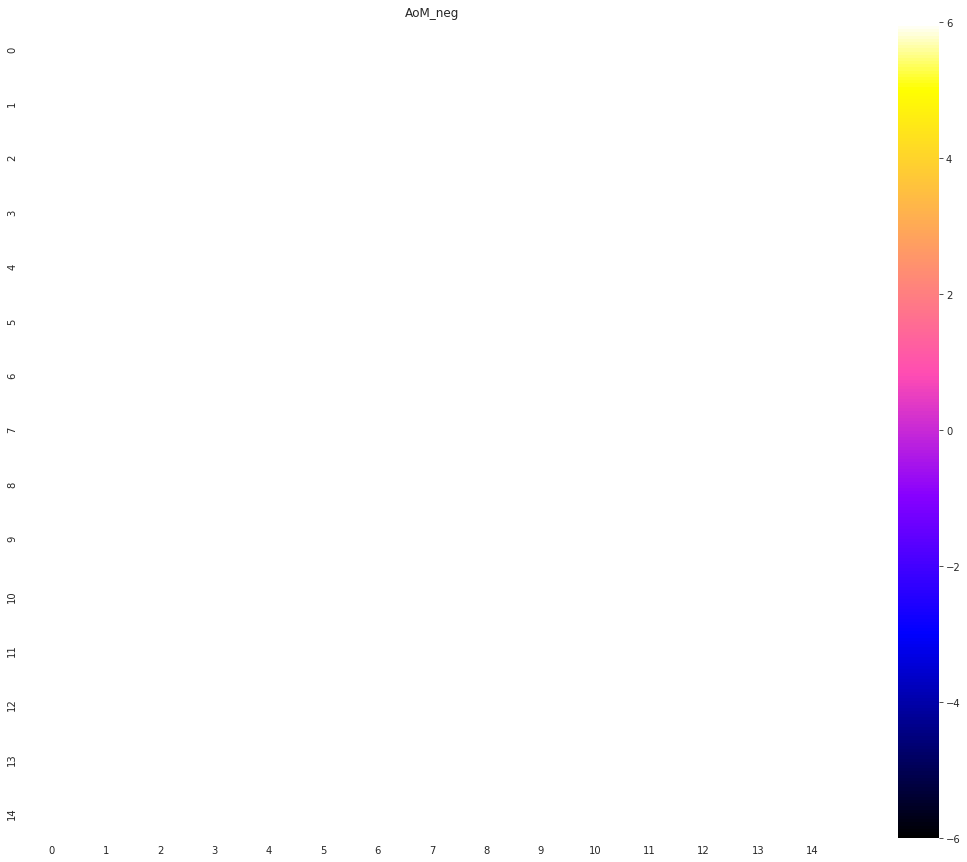

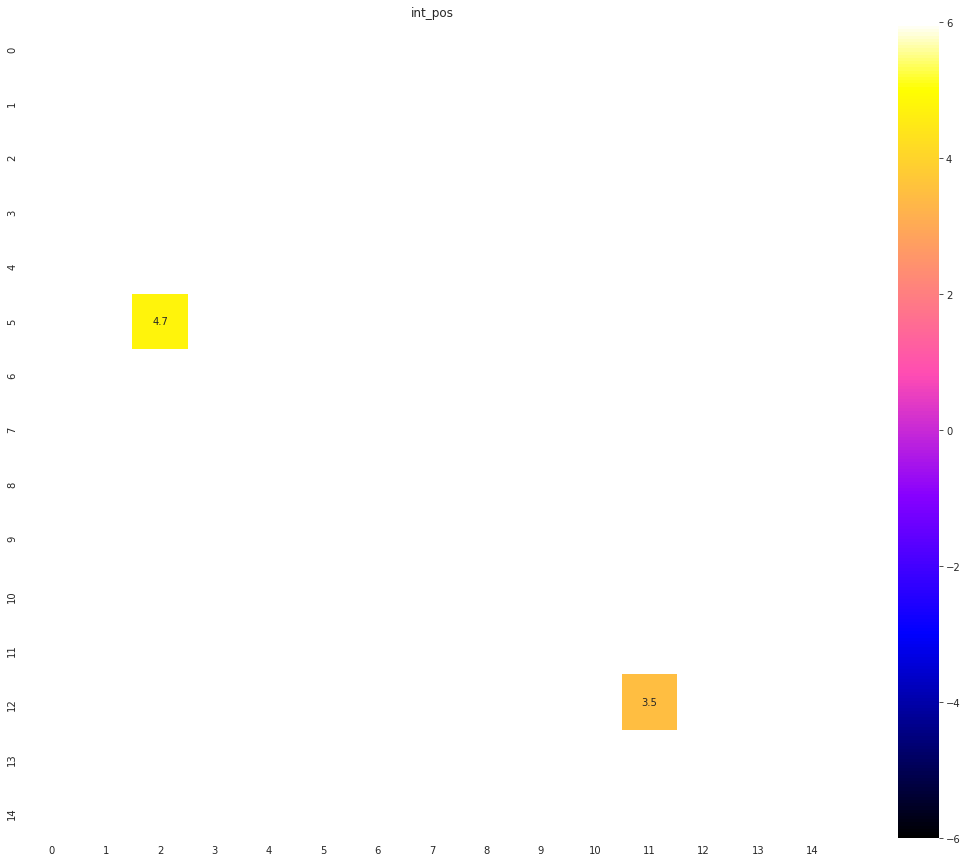

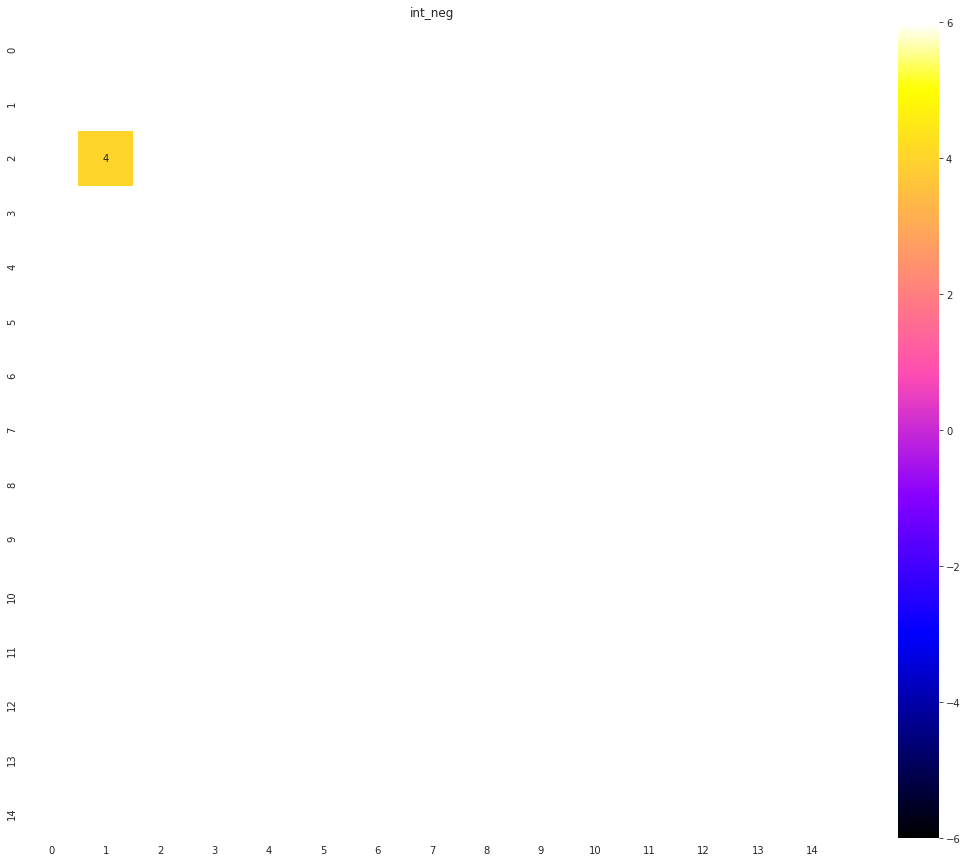

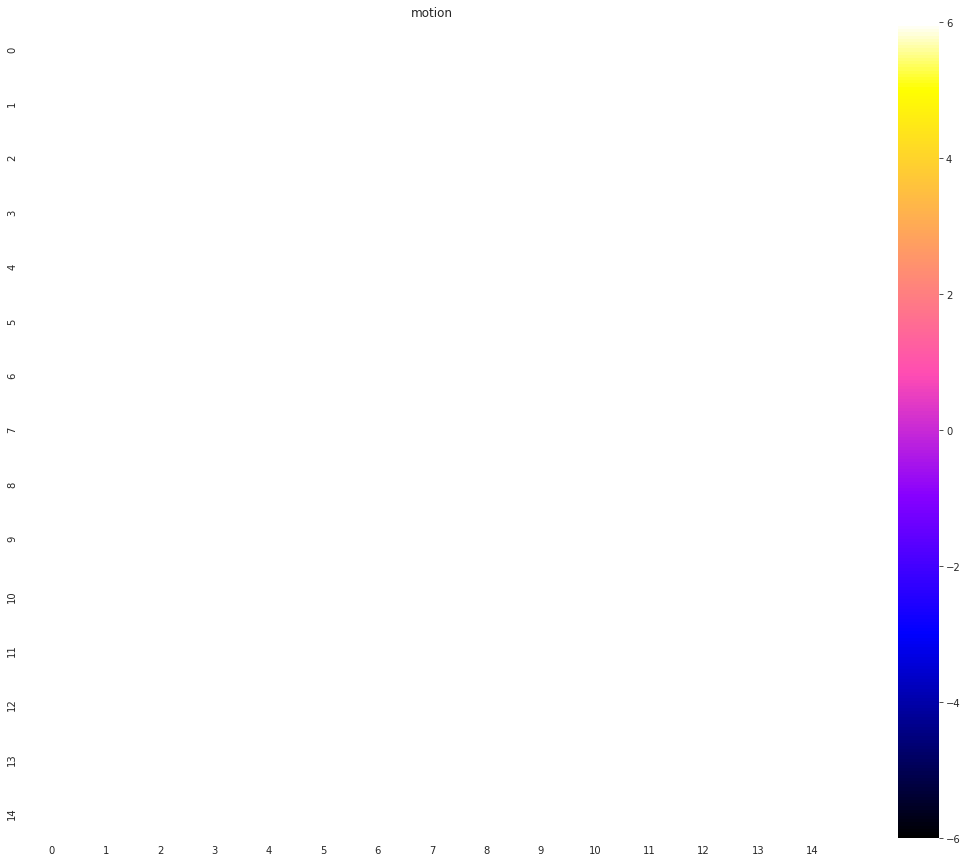

In [240]:
for key, value in motionP.items():
    MRT(motionT, motionP, key)